#**DEEP LEARNING - MIGUEL MARINES**
##**<u>Word Embeddings</u>**
---
---

**Content:**
- Embeddings
- PCA Visualization
- t-SNE Visualization
- Similarity Function
- Analogy Function
---

- Instructions:
    
    - Download GloVe pre-trained vectors.

    - Create a dictorionay of the embeddings to carry out fast look ups. Save that dictionary e.g. as a serialized file for faster loading in future uses.
    
    - PCA and t-SNE Visualization: After loading the GloVe embeddings, use Numpy and Sklearn to perform PCA and t-SNE to reduce the dimensionality of the embeddings and visualize them in a 2D or 3D space.

    - Word Similarity: Implement a function that takes a word as input and returns the 'n' most similar words based on their embeddings. Use Numpy to implement this function, using libraries that already implement this function (e.g. Gensim) will result in zero points.

    - Word Analogies: Implement a function to solve analogies between words. For example, "man is to king as woman is to ____". Use Numpy to implement this function, using libraries that already implement this function (e.g. Gensim) will result in zero points.

##**Environment**

In [1]:
# Libraries

import numpy as np                      # Supports large arrays and matrices, with math functions for manipulation.
from numpy.linalg import norm           # Computes vector norms (e.g., distances).

from sklearn.manifold import TSNE       # Dimensionality reduction for visualization (t-SNE).
from sklearn.decomposition import PCA   # Dimensionality reduction via Principal Component Analysis.

import matplotlib.pyplot as plt         # Visualization and plotting.
plt.style.use('ggplot')                 # Sets plot style to 'ggplot' for aesthetics.

import pickle                           # Serializes/deserializes Python objects for saving/loading data.

In [2]:
# Google Drive in Google Colab.
# Access to files and directories stored in Google Drive from a Colab notebook.
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##**Data Loading**

In [3]:
# Path to the GloVe embeddings file.
PATH = '/content/drive/MyDrive/Deep_Learning_Team/glove.6B.50d.txt'

# Dimensionality of the embeddings (50-dimensional vectors).
emb_dim = 50

##**Embeddings**

In [4]:
# Create dictionary with embeddings.
def create_emb_dictionary(path):
    embeddings_dict = {}                                   # Initialize an empty dictionary for embeddings.
    with open(path, 'r', encoding='utf-8') as f:           # Open the file with UTF-8 encoding.
        for line in f:
            values = line.split()                          # Split each line into word and embedding values.
            word = values[0]                               # The first element is the word (key).
            vector = np.array(values[1:], dtype='float32') # Convert remaining values to a float32 vector.
            embeddings_dict[word] = vector                 # Add word and vector to the dictionary.
    return embeddings_dict                                 # Return the dictionary of embeddings.

In [5]:
# Create a dictionary of embeddings by loading data from the specified path.
embeddings_dict = create_emb_dictionary(PATH)

In [6]:
# Save the embeddings dictionary to a file.

# Serialize
with open('embeddings_dict_50D.pkl', 'wb') as f:
    pickle.dump(embeddings_dict, f)

# Load the embeddings dictionary from a file.
# Deserialize
# with open('embeddings_dict_200D.pkl', 'rb') as f:
#     embeddings_dict = pickle.load(f)

The code in the previous cells performs the following main functions:

1. **Create an Embeddings Dictionary**:
   - The `create_emb_dictionary` function reads a text file containing word embeddings, where each line consists of a word followed by its vector representation.
   - Each word and its corresponding embedding vector are added to a dictionary, with the word as the key and the vector as the value.
   - The function returns this dictionary, making it easy to access word embeddings by simply referencing the word.

2. **Serialize the Dictionary**:
   - After creating the embeddings dictionary, the code serializes (saves) it as a binary file (`embeddings_dict_50D.pkl`) using Python's `pickle` library. This step stores the dictionary on disk, allowing it to be loaded quickly later without reprocessing the text file.

3. **Deserialize the Dictionary**:
   - The code includes an optional deserialization step (currently commented out), which demonstrates how to reload the embeddings dictionary from a previously saved file (`embeddings_dict_200D.pkl`). This is useful for reusing the embeddings dictionary without having to recreate it from the original text file.

###**See Embeddings**

In [7]:
# Function to show embeddings.
def show_n_first_words(path, n_words):
    with open(path, 'r') as f:                          # Open the file.
        for i, line in enumerate(f):
            print(line.split(), len(line.split()[1:]))  # Print each word and the length of its vector.
            if i >= n_words: break                      # Stop after printing the specified number of words.

In [8]:
# Function to show embeddings.
show_n_first_words(PATH, 5)

['the', '0.418', '0.24968', '-0.41242', '0.1217', '0.34527', '-0.044457', '-0.49688', '-0.17862', '-0.00066023', '-0.6566', '0.27843', '-0.14767', '-0.55677', '0.14658', '-0.0095095', '0.011658', '0.10204', '-0.12792', '-0.8443', '-0.12181', '-0.016801', '-0.33279', '-0.1552', '-0.23131', '-0.19181', '-1.8823', '-0.76746', '0.099051', '-0.42125', '-0.19526', '4.0071', '-0.18594', '-0.52287', '-0.31681', '0.00059213', '0.0074449', '0.17778', '-0.15897', '0.012041', '-0.054223', '-0.29871', '-0.15749', '-0.34758', '-0.045637', '-0.44251', '0.18785', '0.0027849', '-0.18411', '-0.11514', '-0.78581'] 50
[',', '0.013441', '0.23682', '-0.16899', '0.40951', '0.63812', '0.47709', '-0.42852', '-0.55641', '-0.364', '-0.23938', '0.13001', '-0.063734', '-0.39575', '-0.48162', '0.23291', '0.090201', '-0.13324', '0.078639', '-0.41634', '-0.15428', '0.10068', '0.48891', '0.31226', '-0.1252', '-0.037512', '-1.5179', '0.12612', '-0.02442', '-0.042961', '-0.28351', '3.5416', '-0.11956', '-0.014533', '-0.

The code in the previous cells performs the following main functions:

The code snippet is designed to display the embeddings of the first few words from a text file containing word embeddings.

1. **Define Function to Show Embeddings**:
   - The `show_n_first_words` function reads through a file located at `path` and prints the embeddings for a specified number of words (`n_words`).
   - Each line in the file is expected to contain a word followed by its embedding vector values.
   - For each line, the function splits the text, then prints the word, its vector, and the vector length.
   - The loop stops once the specified number of words have been printed, making it easy to inspect a subset of embeddings in the file.

2. **Execute the Function**:
   - The function is called with `show_n_first_words(PATH, 5)`, where `PATH` is the file path, and `5` is the number of words to display.

###**Plot Embeddings**

In [9]:
# Function to reduce dimensionality and plot embeddings.
def plot_embeddings(emb_path, words2show, emb_dim, embeddings_dict, func=PCA):

    # Extract embeddings for the selected words.
    words_embeddings = np.array([embeddings_dict[word] for word in words2show if word in embeddings_dict])

    # Check if all words were found in the dictionary.
    if len(words_embeddings) < len(words2show):
        print("Some words were not found in the embeddings dictionary.")
        return

    # Dimensionality reduction.
    if func == PCA:
        reducer = PCA(n_components=2)
    elif func == TSNE:
        reducer = TSNE(n_components=2, random_state=0)
    else:
        raise ValueError("Unsupported dimensionality reduction function.")

    embeddings_2d = reducer.fit_transform(words_embeddings)

    # Plot words in 2D space.
    plt.figure(figsize=(10, 10))
    for i, word in enumerate(words2show):
        if word in embeddings_dict:
            x, y = embeddings_2d[i]
            plt.scatter(x, y)
            plt.annotate(word, (x, y), textcoords="offset points", xytext=(5, 2), ha='center')

    plt.title(f"Visualization of Word Embeddings using {func.__name__}")
    plt.xlabel("Dimension 1")
    plt.ylabel("Dimension 2")
    plt.grid(True)
    plt.show()

In [10]:
# List of words.
words = ['burger', 'tortilla', 'bread', 'pizza', 'beef', 'steak', 'fries', 'chips',
            'argentina', 'mexico', 'spain', 'usa', 'france', 'italy', 'greece', 'china',
            'water', 'beer', 'tequila', 'wine', 'whisky', 'brandy', 'vodka', 'coffee', 'tea',
            'apple', 'banana', 'orange', 'lemon', 'grapefruit', 'grape', 'strawberry', 'raspberry',
            'school', 'work', 'university', 'highschool']

The code in the previous cells is designed to visualize word embeddings by reducing their dimensionality and plotting them in a 2D space.

1. **Define the `plot_embeddings` Function**:
   - The function `plot_embeddings` takes in a file path (`emb_path`), a list of words to display (`words2show`), the embedding dimensions (`emb_dim`), a dictionary of embeddings (`embeddings_dict`), and an optional dimensionality reduction function (`func`, defaulting to PCA).
   - It extracts embeddings for the specified words from `embeddings_dict` and reduces their dimensionality to 2D using the specified reduction method (PCA or t-SNE).
   - If a word from `words2show` is missing in `embeddings_dict`, it prints a message and stops execution.

2. **Dimensionality Reduction and Visualization**:
   - Using either PCA or t-SNE, the embeddings are projected onto a 2D plane.
   - The function then creates a scatter plot for each word, displaying the reduced 2D representation of its embedding and labeling each point with the corresponding word.

3. **Word List**:
   - A list of words (`words`) is defined, covering various categories like food, countries, beverages, fruits, and education. This list will be used to select embeddings for visualization.

####**Visualization of Word Embeddings using PCA**

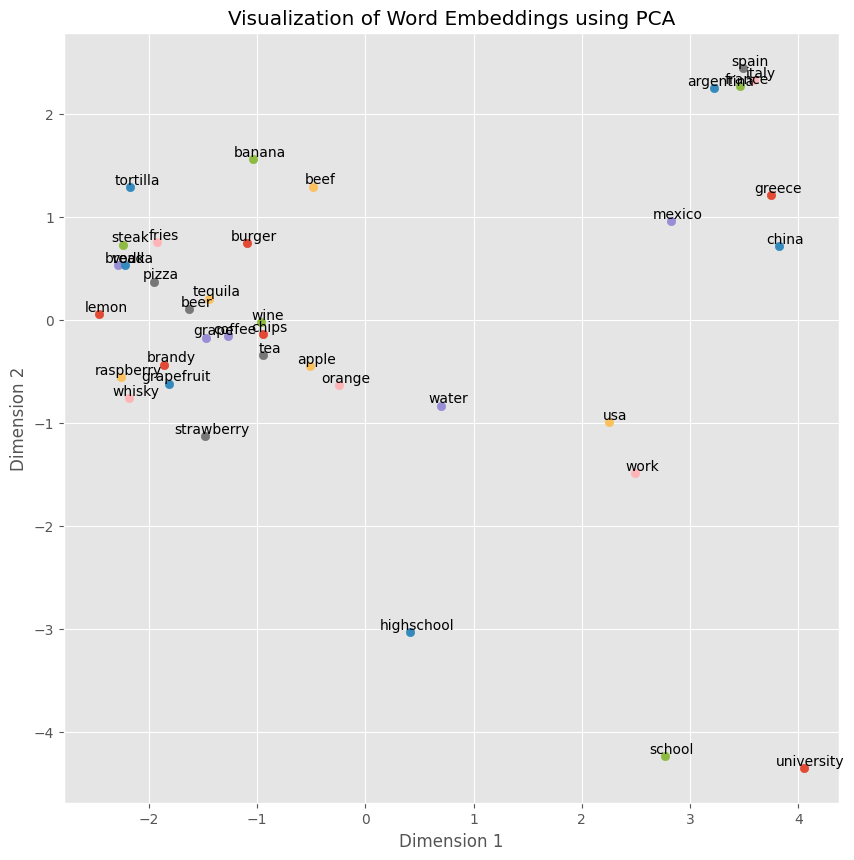

In [11]:
# Plot the specified words' embeddings using PCA for dimensionality reduction.
plot_embeddings(PATH, words, emb_dim, embeddings_dict, PCA)

####**Visualization of Word Embeddings using TSNE**

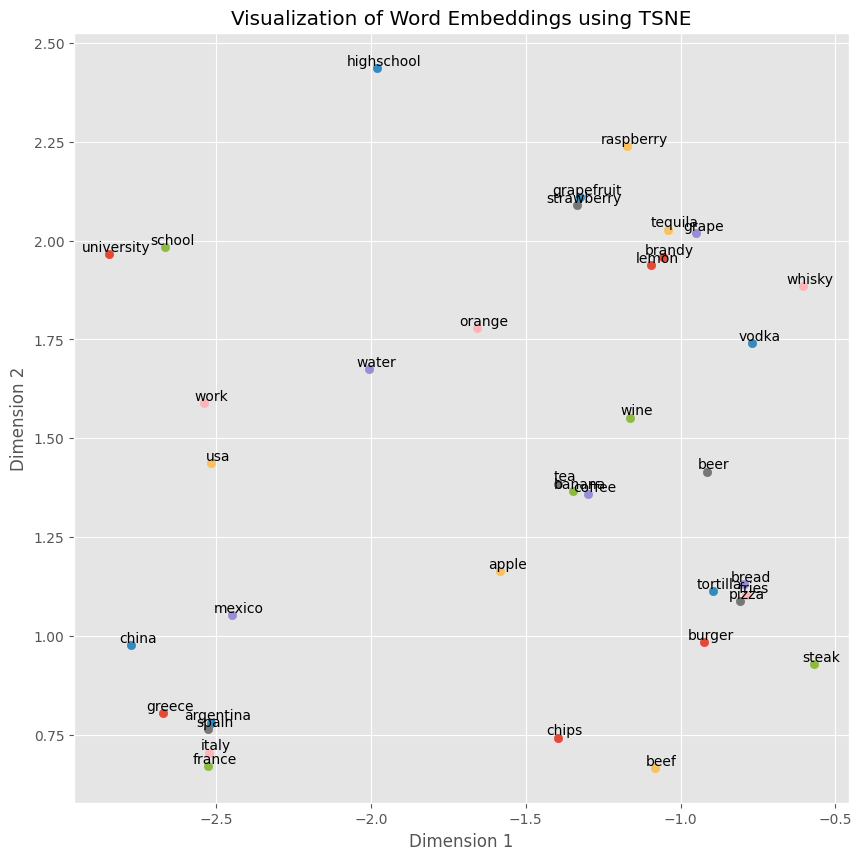

In [12]:
# Plot the specified words' embeddings using t-SNE for dimensionality reduction
embeddings = plot_embeddings(PATH, words, emb_dim, embeddings_dict, TSNE)

##**Analogy**

In [13]:
# Analogy Function
def analogy(word1, word2, word3, embeddings_dict):

    # Check if words are in the embeddings dictionary.
    if word1 not in embeddings_dict or word2 not in embeddings_dict or word3 not in embeddings_dict:
        return "One or more words are not in the embeddings dictionary."

    # Calculate the target word vector (word4_vector).
    word1_vector = embeddings_dict[word1]
    word2_vector = embeddings_dict[word2]
    word3_vector = embeddings_dict[word3]
    word4_vector = word2_vector - word1_vector + word3_vector

    # Initialize variables to find the closest word to word4_vector.
    closest_word = None
    closest_distance = -float('inf')

    # Calculate cosine similarity for each word in the dictionary.
    for word, vector in embeddings_dict.items():
        # Exclude input words.
        if word in [word1, word2, word3]:
            continue

        # Cosine similarity between word4_vector and the current vector.
        distance = np.dot(word4_vector, vector) / (np.linalg.norm(word4_vector) * np.linalg.norm(vector))

        # Update if a closer word is found.
        if distance > closest_distance:
            closest_word = word
            closest_distance = distance

    return f"{word1} is to {word2} as {word3} is to {closest_word}"

In [14]:
# Analogy Function
analogy('mexico', 'mexican', 'spain', embeddings_dict)

'mexico is to mexican as spain is to spanish'

The code in the previous cells defines a function to perform word analogy tasks using word embeddings.

1. **Define the `analogy` Function**:
   - The `analogy` function accepts three input words (`word1`, `word2`, `word3`) and an embeddings dictionary (`embeddings_dict`).
   - It attempts to find a fourth word (`word4`) that best completes the analogy: `"word1 is to word2 as word3 is to word4"`.
   
2. **Check for Word Presence**:
   - The function first checks that all input words exist in `embeddings_dict`. If any word is missing, it returns an error message.

3. **Compute Target Vector**:
   - It calculates the target vector (`word4_vector`) by combining the vectors for `word1`, `word2`, and `word3` in the form: `word4_vector = word2_vector - word1_vector + word3_vector`. This approach is common for analogies in word embeddings (e.g., “king” - “man” + “woman” ≈ “queen”).

4. **Find the Closest Word**:
   - The function iterates over each word in `embeddings_dict` to find the vector closest to `word4_vector`, calculating cosine similarity to determine similarity.
   - It skips the input words (`word1`, `word2`, `word3`) to avoid returning one of them as the answer.
   - The word with the highest similarity score is assigned as `closest_word`.

5. **Return the Analogy Result**:
   - The function returns the analogy in the format: `"{word1} is to {word2} as {word3} is to {closest_word}"`.

##**Similarity**

In [15]:
# Similar Function
# Function to find the most similar words.
def find_most_similar(word, embeddings_dict, top_n=10):

    # Check if the word is in the embeddings dictionary.
    if word not in embeddings_dict:
        return f"The word '{word}' is not in the embeddings dictionary."

    # Get the embedding vector for the given word.
    word_vector = embeddings_dict[word]

    # List to store words and their similarities.
    similarities = []

    # Calculate cosine similarity with each word in the dictionary.
    for other_word, other_vector in embeddings_dict.items():
        if other_word == word:
            continue  # Ignore the same word

        # Calculate cosine similarity.
        similarity = np.dot(word_vector, other_vector) / (np.linalg.norm(word_vector) * np.linalg.norm(other_vector))
        similarities.append((other_word, similarity))

    # Sort the list by similarity in descending order.
    similarities.sort(key=lambda x: x[1], reverse=True)

    # Return the top_n results.
    return similarities[:top_n]

In [16]:
# Similar Function
most_similar = find_most_similar('mexico', embeddings_dict)

In [17]:
# Show results for mos similar words.
for i, w in enumerate(most_similar, 1):
    print(f'{i} ---> {w[0]}')

1 ---> mexican
2 ---> venezuela
3 ---> colombia
4 ---> peru
5 ---> chile
6 ---> puerto
7 ---> rico
8 ---> cuba
9 ---> guatemala
10 ---> panama


The code in the previous cells defines a function to perform word similarity tasks using word embeddings.

1. **Define the `find_most_similar` Function**:
   - The function `find_most_similar` takes a target word, an embeddings dictionary (`embeddings_dict`), and an optional parameter `top_n` which sets the number of similar words to return (default is 10).
   
2. **Check Word Presence**:
   - It checks if the target word exists in `embeddings_dict`. If the word is not found, it returns a message indicating that the word is missing.

3. **Calculate Cosine Similarities**:
   - It retrieves the vector for the target word from `embeddings_dict`.
   - Then, it iterates over each word in the dictionary (excluding the target word itself) to calculate cosine similarity between the target word's vector and each other word vector.
   - Cosine similarity is a common measure used to quantify the similarity between two vectors based on their orientation.

4. **Sort and Return Most Similar Words**:
   - The function sorts all word-similarity pairs in descending order of similarity.
   - Finally, it returns the top `n` similar words, based on the specified or default value of `top_n`.